In [177]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_theme(style="white")


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from datetime import datetime as dt
from collections import Counter

import pickle

from tqdm import tqdm

# Loading the Data

In [102]:
df_credit = pd.read_csv('credit_train.csv', encoding="ISO-8859-1", delimiter=';' )

# EDA

In [103]:
df_credit.shape

(170746, 15)

This dataset have:
- 170,746 rows
- 15 columns

In [104]:
#Which features are available in the dataset
df_credit.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'living_region', 'monthly_income', 'credit_count',
       'overdue_credit_count', 'open_account_flg'],
      dtype='object')

In [105]:
#Checking the first 5 rows of the dataset?
df_credit.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,48,MAR,UMN,"59998,00",10,1.6,"0,770249",GRD,ÊÐÀÑÍÎÄÀÐÑÊÈÉ ÊÐÀÉ,30000.0,1.0,1.0,0
1,2,F,28,MAR,UMN,"10889,00",6,1.1,"0,248514",GRD,ÌÎÑÊÂÀ,43000.0,2.0,0.0,0
2,3,M,32,MAR,SPC,"10728,00",12,1.1,"0,459589",SCH,ÎÁË ÑÀÐÀÒÎÂÑÊÀß,23000.0,5.0,0.0,0
3,4,F,27,DIV,SPC,"12009,09",12,1.1,"0,362536",GRD,ÎÁË ÂÎËÃÎÃÐÀÄÑÊÀß,17000.0,2.0,0.0,0
4,5,M,45,MAR,SPC,"16908,89",10,1.1,"0,421385",SCH,×ÅËßÁÈÍÑÊÀß ÎÁËÀÑÒÜ,25000.0,1.0,0.0,0


In [106]:
#Checking the last 5 rows of the dataset
df_credit.tail()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
170741,170742,F,27,UNM,SPC,"64867,00",12,1.10,"0,535257",GRD,ÐÅÑÏÓÁËÈÊÀ ÒÀÒÀÐÑÒÀÍ,40000.0,6.0,0.0,0
170742,170743,F,24,MAR,SPC,"17640,00",6,1.60,"0,573287",SCH,ÑÀÍÊÒ-ÏÅÒÅÐÁÓÐÃ Ã,30000.0,1.0,0.0,0
170743,170744,F,31,UNM,SPC,"27556,47",10,1.32,"0,416098",GRD,ÏÐÈÌÎÐÑÊÈÉ ÊÐÀÉ,40000.0,1.0,0.0,0
170744,170745,F,53,DIV,PNA,"6189,00",12,1.10,"0,482595",SCH,ÏÅÍÇÅÍÑÊÀß ÎÁË,31000.0,2.0,0.0,0
170745,170746,M,49,MAR,SPC,"12787,00",10,1.10,"0,316087",GRD,ÎÁË ÌÎÑÊÎÂÑÊÀß,40000.0,3.0,0.0,0


### By taking a pick at the first and last five rows of the dataset, I can see the following:

- The columns ***gender, marital_status, job position, tarrif_id, education, open_account_flg*** contain the categorical data.


- The columns ***credit_sum*** and ***score_shk** contain the numerical data; however, instead of a comma(,), there should be the point(.), which ***needs to be taken care*** before using descriptive statistics.


- The remaning columns ***client_id, age, credit_month, monthly_income, credit_count, overdue_credit_count*** contain numerical data.




In [107]:
#Changing commas to points and converting "credit_sum" and "score_shk" data to the float dtype.
df_credit['credit_sum'] = df_credit['credit_sum'].replace(',','.', regex= True).astype(dtype = float)
df_credit['score_shk'] = df_credit['score_shk'].replace(',','.', regex= True).astype(dtype = float)

In [108]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170746 non-null  int64  
 3   marital_status        170746 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170746 non-null  float64
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170746 non-null  float64
 9   education             170746 non-null  object 
 10  living_region         170554 non-null  object 
 11  monthly_income        170745 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

### By looking at the above information, we can see that there are:

  - Four features' dtype is int
  
  
  - Five features' dtype is object
  
  
  - Six features'  dtype is float

## Checking Missing Values

In [109]:
round(df_credit.isnull().sum() / df_credit.shape[0], ndigits=6) * 100

client_id               0.0000
gender                  0.0000
age                     0.0000
marital_status          0.0000
job_position            0.0000
credit_sum              0.0000
credit_month            0.0000
tariff_id               0.0000
score_shk               0.0000
education               0.0000
living_region           0.1124
monthly_income          0.0006
credit_count            5.4057
overdue_credit_count    5.4057
open_account_flg        0.0000
dtype: float64

- For some reason, **around 5%** of values in the columns **'credit_count'** and **"overdue_credit_count"** are **NaN**.

- Also, the columns **"living_region"** and **'monthly_income'** have **less than 1% of the nan values**.

## The distribution of the numeric features

In [110]:
#Temporarily dropping the column tariff_id as it is a categorical feature.
df_credit.drop('tariff_id', axis = 1).describe()

,client_id,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170745.000000,161516.000000,161516.000000,170746.000000
mean,85373.500000,36.497283,26095.047799,10.980749,0.469473,40138.288354,2.107308,0.046070,0.176028
std,49290.268869,10.546008,16234.794320,3.536698,0.124268,25044.205336,1.777128,0.211548,0.380845
min,1.000000,18.000000,2736.000000,3.000000,0.000000,5000.000000,0.000000,0.000000,0.000000
25%,42687.250000,28.000000,14908.000000,10.000000,0.379495,25000.000000,1.000000,0.000000,0.000000
50%,85373.500000,34.000000,21229.000000,10.000000,0.461599,35000.000000,2.000000,0.000000,0.000000
75%,128059.750000,43.000000,32068.000000,12.000000,0.552419,50000.000000,3.000000,0.000000,0.000000
max,170746.000000,71.000000,200000.000000,36.000000,1.128291,950000.000000,21.000000,3.000000,1.000000


#### The descriptive statistics of the numeric columns tell the following:

- ***'age'*** column: The **average** age of clients is **36 years**, the **youngest** is **18 years**, and the **oldest** is **71** years. Also, the **standard deviation of 10** indicates the age **data are more spread-out**, which means this column contains a **high variation of ages**.


- **'credit_month'** column: It shows that the **maximum and minimum **credit terms** are **10 months and 36 months, respectively**. **Most credit terms are around 10 to 12 months**.


- **'monthly_income'** column: The **median** income of clients is **35,000**. In addition, the **standard deviation of the 25,044** means that some of the clients' salary either very high or very less which means it is **far from average(40138.28)**.


- **'credit_count'** column: At the moment of application, there are **some individuals** who have up to **21 loans** and others who do not have any; however, **on average**, clients have around **2 to 3 loans**.


- **'overdue_credit_count'** column: **Most** of the clients **do not have any overdue credits**; nevertheless, they are **some individuals who were behind schedule on a loan payment more than once**.


- **'open_account_flg'** column: According to these samples, we can see that the bank approval for **opening a credit bank account is around 17%**. Also, it is the **target(y) column**, which is **clearly unbalanced**; therefore, before creating the model, I **need to use over/under/combined sampling** and check the model's performance.  

## The distribution of categorical features

In [111]:
df_credit.describe(include=['O'])

,gender,marital_status,job_position,education,living_region
count,170746,170746,170746,170746,170554
unique,2,5,18,5,301
top,F,MAR,SPC,SCH,ÎÁË ÌÎÑÊÎÂÑÊÀß
freq,88697,93956,134680,87539,12228


#### The descriptive statistics of the categorical columns tell the following:

- **'gender'** column: **51%(freq 88697/170746)** of clients within the sample dataset are **F(female)**, while **49% are M(men)**.(**2 unique values**)


- **'marital_status** column : Around **55%(93956/170746)** of the clients are **married**.(**5 unique values**)


- **'job_position'** column: According to the dataset, **78%(134680/170746)** of the clients have **SPC job positions**.(**18 unique values**)


- **'education'** column: **Around 51%(87539/170746)** of clients have earned only the **SCH (school-high school diploma)**. (**5 unique values**)


- **'living_region'**: This column contains the living region values of clients.(**301 unique values**)

## Visualisation of categorical features

In [112]:
def barplot_vis(col_name:str, df):
    """
    :param col_name: The catigorical column name that need to be visualize
    return: Returns bar plot visualisation of categorical data
    """
    
    #Adjusting the graph's figure size
    plt.figure(figsize=(8,4))
    
    #Creating the DataFrame that contains the categorical labels and the counts of each category.
    count_df = df[col_name].value_counts().rename_axis(col_name).reset_index(name='count')
    
    #Creating the bar plot
    ax = sns.barplot(data=count_df ,y=col_name,x='count')
    
    #Adding and making adjustments to the bar labels.
    ax.bar_label(ax.containers[0],padding= 8 ,fontsize=15, color = 'black')
    
    #Setting the color style
    sns.set_palette(sns.color_palette("pastel"))
    
    #Setting the graph's x and y labels and title.
    plt.title(f'Column: {col_name}',fontdict = {'size': 13} )
    ax.set_xlabel('Count',size = 13)
    ax.set_ylabel(col_name,size = 13)
    ax.set_yticklabels(count_df[col_name], fontdict = {'fontsize': 15})
    
    #Removing the top and right spines from the plot
    sns.despine()
    plt.show()

In [113]:
opened_acc_df = df_credit[df_credit['open_account_flg'] == 1]

#### ***Column gender***

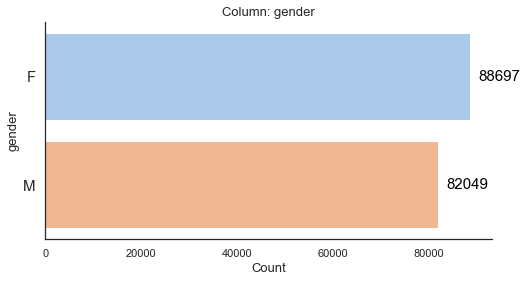

In [115]:
barplot_vis('gender', df_credit)

- We can see that the gender contains only **two unique values, F(Female) and M(Male)**.


- According to the bar plot, it can be seen that there are more **F(female) than M(male)** samples, **51% and 48%, respectively**.


*Did F(female)s opened more accounts or M(male)s?* 

In [116]:
opened_acc_df[['gender','open_account_flg','client_id']].groupby(['gender','open_account_flg']).count().sort_values('client_id', ascending = False)

,,client_id
gender,open_account_flg,
M,1,15881
F,1,14175


- **Even though there are more F(female)s** samples in the dataset, the **man samples that got to open accounts are more**. **(Male = 15881, Female = 14175)**

#### ***Column Marital Status***

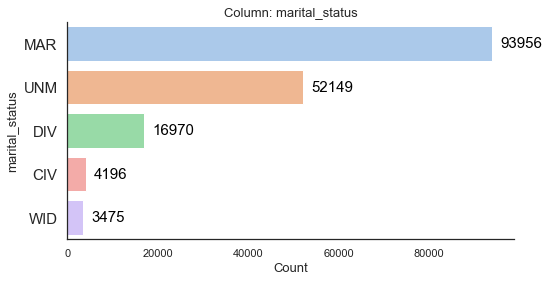

In [117]:
barplot_vis('marital_status', df_credit)

- The marital_status column has **5 unique category values**.


- By looking at the above graph, we can see that **55%(93956/170746) ** of clients are **married**.


- Also, the percentage of **unmarried and divorced** clients is **around (52149/170746)30% and (16970/170746)10%, respectively**.


- The percentage of **widowed people** is less than **3%**.

In [118]:
opened_acc_df[['marital_status','open_account_flg','client_id']].groupby(['marital_status','open_account_flg']).count().sort_values('client_id', ascending = False)

,,client_id
marital_status,open_account_flg,
MAR,1,14368
UNM,1,11016
DIV,1,3090
CIV,1,846
WID,1,736


- According to the above sample data, **most of the clients who have opened credit accounts are married(47%) and unmarried(36)**%.
<br> *Calculation = (Total opened credit accounts: 30056,  married:14368/ total 30056 =47%,  unmarried:11016/ total:30056=36%).*

#### ***Column Job Position***

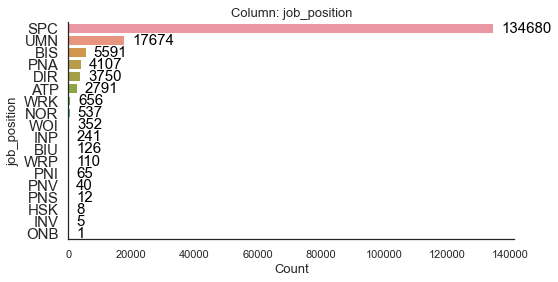

In [119]:
barplot_vis('job_position', df_credit)

- The job_position column has **18 unique category values**.


- **Most clients** within the sample dataset have **SPC(around 80%) type job positions**.

In [120]:
opened_acc_df[['job_position','open_account_flg','client_id']].groupby(['job_position','open_account_flg']).count().sort_values('client_id', ascending = False)

,,client_id
job_position,open_account_flg,
SPC,1,22403
UMN,1,3340
PNA,1,1489
BIS,1,885
ATP,1,807
DIR,1,555
NOR,1,194
WRK,1,121
WOI,1,84


 - Clients with **SPC job positions** are those who are **opened most credit card accounts**. 

## Job positions

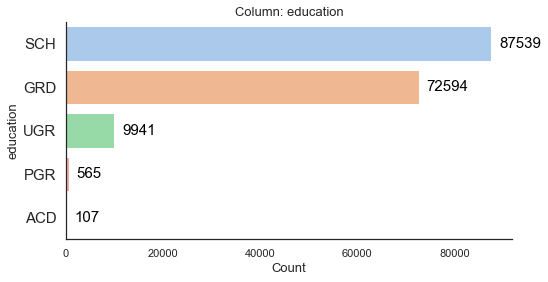

In [121]:
barplot_vis('education', df_credit)

- The education column has **5 unique categorical values**.

- There are **more clients with SCH and GRD education levels** within the sample dataset.

In [122]:
opened_acc_df[['education','open_account_flg','client_id']].groupby(['education','open_account_flg']).count().sort_values('client_id', ascending = False)

,,client_id
education,open_account_flg,
SCH,1,17956
GRD,1,10130
UGR,1,1837
PGR,1,108
ACD,1,25


In [123]:
df_credit.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'living_region', 'monthly_income', 'credit_count',
       'overdue_credit_count', 'open_account_flg'],
      dtype='object')

In [124]:
tmp = df_credit.drop(['client_id','gender','marital_status','job_position','tariff_id','education','living_region'], axis =1 )

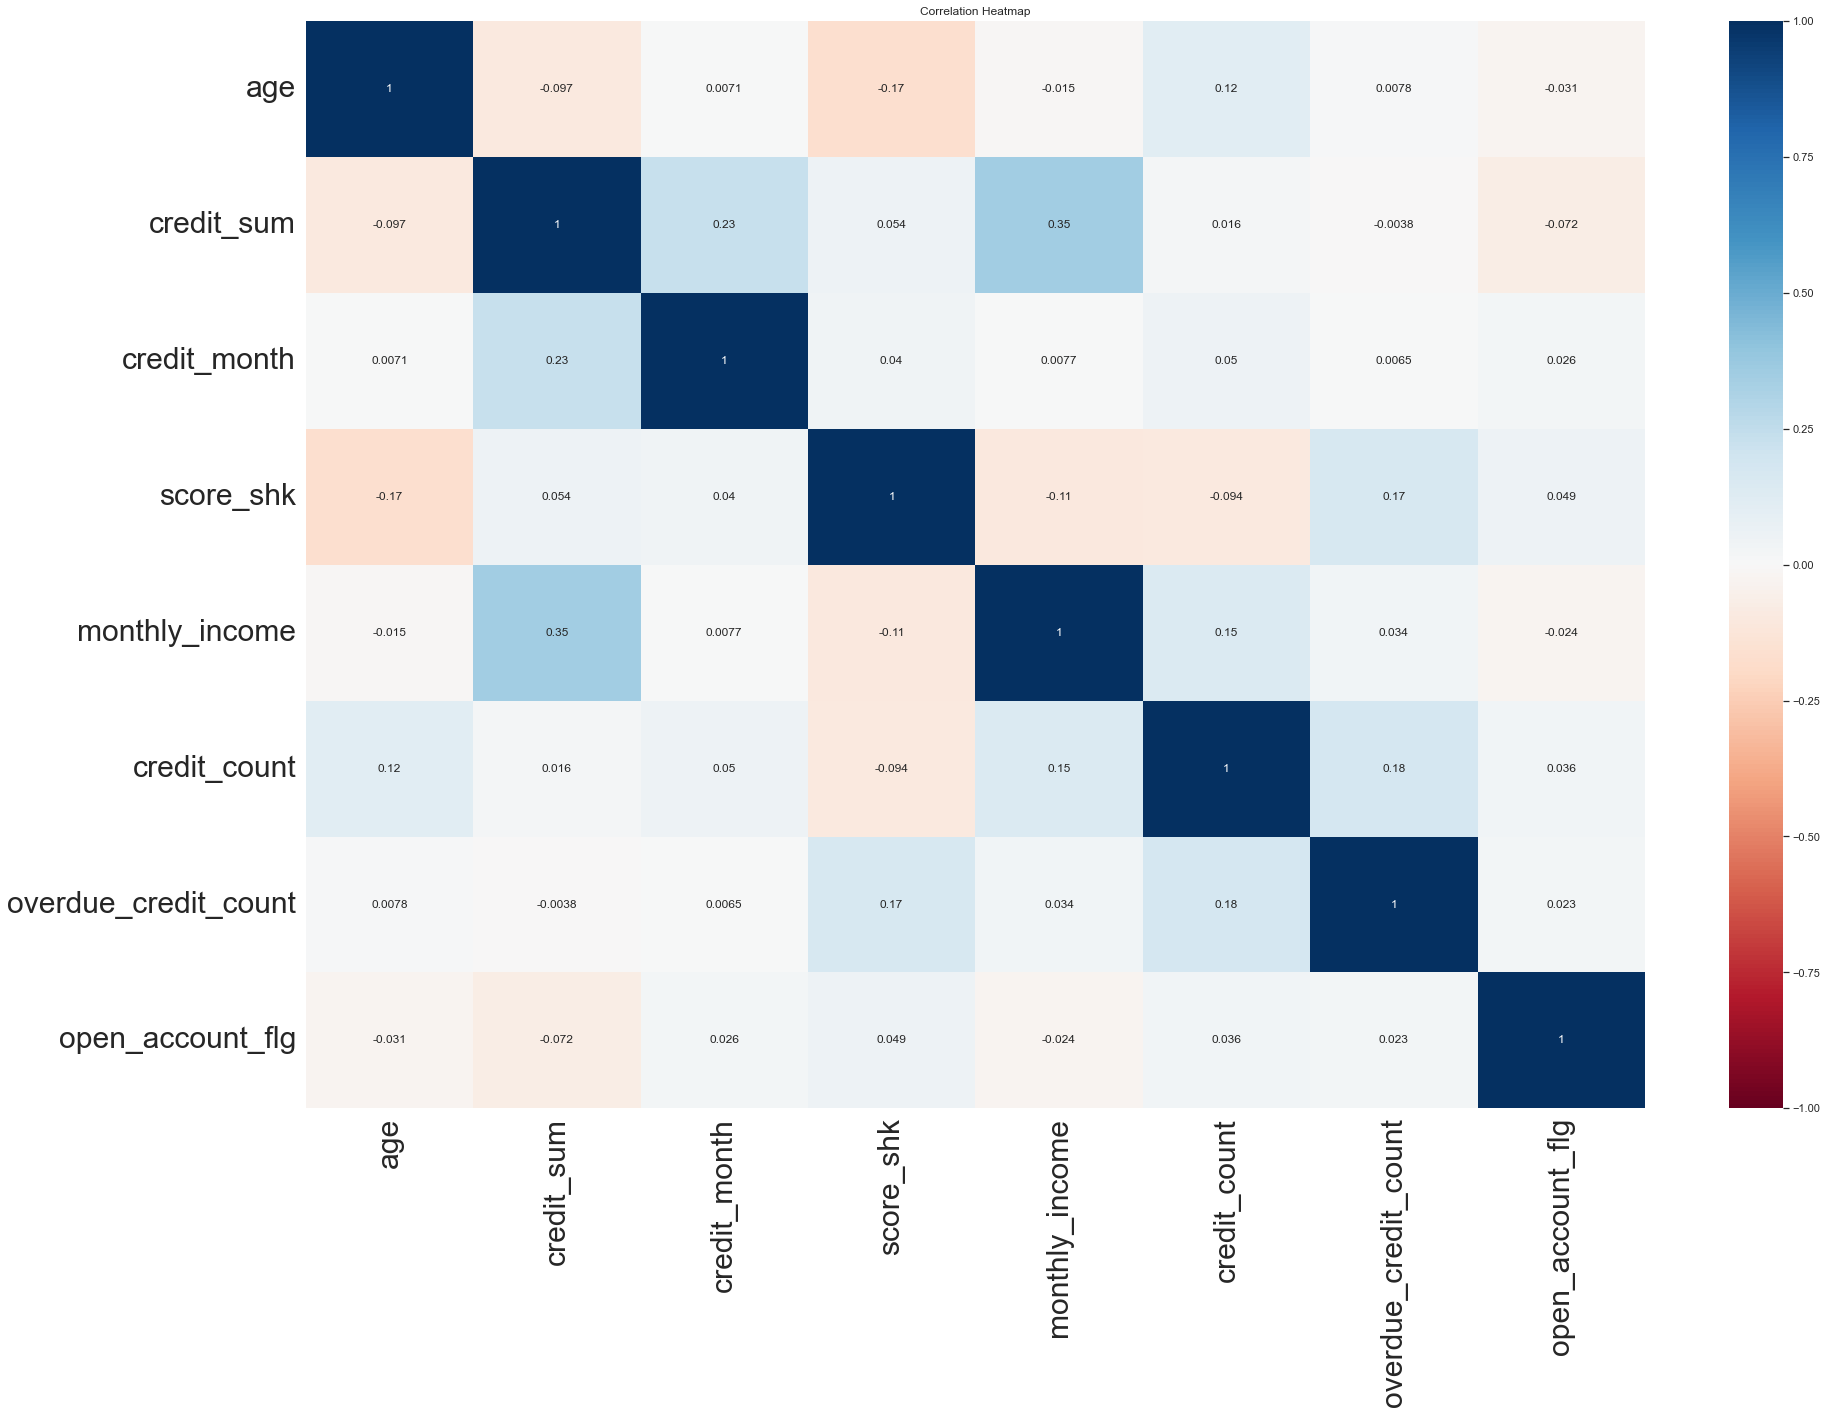

In [125]:
plt.figure(figsize = (30, 20))
s = sns.heatmap(tmp.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 30)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 30)
plt.title('Correlation Heatmap')
plt.show()



There are some moderate correalations between following features:
   - **credit_sum and creadit_month = positive 0.23**
   - **credit_sum and monthly income = positive 0.35**
<br> However, the **moderate correlation is not a good reason for dropping those columns**.

# Data Preprocessing

## Dropping Columns

In [126]:
df_credit.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'living_region', 'monthly_income', 'credit_count',
       'overdue_credit_count', 'open_account_flg'],
      dtype='object')

In [127]:
df_credit.drop(['client_id','living_region'], axis = 1,inplace = True )

In [128]:
df_credit.shape

(170746, 13)

## Filling missing value with median

In [129]:
df_credit.isnull().sum()

gender                     0
age                        0
marital_status             0
job_position               0
credit_sum                 0
credit_month               0
tariff_id                  0
score_shk                  0
education                  0
monthly_income             1
credit_count            9230
overdue_credit_count    9230
open_account_flg           0
dtype: int64

Need to check the median of columns 'monthly_income', 'credit_count,' 'overdue_credit_count' before filling the Nan Values.


 - 1. Need to check the median when df has samples that belong to the category open_account_flg = 1.
 
 
 - 2. Need to check the median when df has samples that belong to the category open_account_flg = 0.
 
 
**If the 'monthly_income,' 'credit_count,' and 'overdue_credit_count' columns' median in both categories is the same, then I am going to use the same median to fill the column's nan values of both categories**.

In [130]:
df_credit[['monthly_income','credit_count','overdue_credit_count']].describe()

,monthly_income,credit_count,overdue_credit_count
count,170745.000000,161516.000000,161516.000000
mean,40138.288354,2.107308,0.046070
std,25044.205336,1.777128,0.211548
min,5000.000000,0.000000,0.000000
25%,25000.000000,1.000000,0.000000
50%,35000.000000,2.000000,0.000000
75%,50000.000000,3.000000,0.000000
max,950000.000000,21.000000,3.000000


In [131]:
df_credit[df_credit['open_account_flg']== 0][['monthly_income','credit_count','overdue_credit_count']].describe()

,monthly_income,credit_count,overdue_credit_count
count,140689.000000,134909.000000,134909.000000
mean,40412.558601,2.078883,0.043867
std,25402.589188,1.750912,0.206457
min,5000.000000,0.000000,0.000000
25%,25000.000000,1.000000,0.000000
50%,35000.000000,2.000000,0.000000
75%,50000.000000,3.000000,0.000000
max,950000.000000,19.000000,3.000000


In [132]:
median_stats = {
    'monthly_income':int(df_credit['monthly_income'].median()),
    'credit_count':df_credit['credit_count'].median(),
    'overdue_credit_count':df_credit['overdue_credit_count'].median()
}

In [133]:
median_stats

{'monthly_income': 35000, 'credit_count': 2.0, 'overdue_credit_count': 0.0}

In [134]:
#Filling Nan Values with median value
df_credit['monthly_income'].fillna(median_stats['monthly_income'], inplace=True)
df_credit['credit_count'].fillna(median_stats['credit_count'], inplace=True)
df_credit['overdue_credit_count'].fillna(median_stats['overdue_credit_count'], inplace=True)

## One-Hot-Encoding

In [135]:
on_enc = OneHotEncoder()
categorical_data = df_credit[['gender','marital_status','job_position','tariff_id','education']]
encoded_data = on_enc.fit_transform(categorical_data)
df_encoded_data = pd.DataFrame(encoded_data.toarray(), columns= on_enc.get_feature_names_out()).astype(dtype = int)

#Concatenating the encoded DataFrame with the original DataFrame.
df_encoded_data = pd.concat([df_encoded_data, df_credit], axis = 1 )

#Dropping the original categorical features
df_encoded_data.drop(['gender','marital_status','job_position','tariff_id','education'], axis = 1, inplace = True)
df_encoded_data.shape

(170746, 70)

## Undersampling

In [136]:
under_sampling = RandomUnderSampler(sampling_strategy = 1, random_state=365)

In [137]:
#Dividing features into X and y.
X = df_encoded_data.drop('open_account_flg', axis = 1)
y = df_encoded_data['open_account_flg']

In [138]:
#Under sampling 
X_under_sampled, y_under_sampled = under_sampling.fit_resample(X, y)
print(f"Combined Random Sampling: {Counter(y_under_sampled)}")

Combined Random Sampling: Counter({0: 30056, 1: 30056})


In [142]:
X_under_sampled.shape

(60112, 69)

In [139]:
pd.options.display.max_rows = 100

In [141]:
X_under_sampled.dtypes

gender_F                  int64
gender_M                  int64
marital_status_CIV        int64
marital_status_DIV        int64
marital_status_MAR        int64
marital_status_UNM        int64
marital_status_WID        int64
job_position_ATP          int64
job_position_BIS          int64
job_position_BIU          int64
job_position_DIR          int64
job_position_HSK          int64
job_position_INP          int64
job_position_INV          int64
job_position_NOR          int64
job_position_ONB          int64
job_position_PNA          int64
job_position_PNI          int64
job_position_PNS          int64
job_position_PNV          int64
job_position_SPC          int64
job_position_UMN          int64
job_position_WOI          int64
job_position_WRK          int64
job_position_WRP          int64
tariff_id_1.0             int64
tariff_id_1.1             int64
tariff_id_1.16            int64
tariff_id_1.17            int64
tariff_id_1.18            int64
tariff_id_1.19            int64
tariff_i

## Test- Train Split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_under_sampled, 
                                                    y_under_sampled, 
                                                    random_state=365, 
                                                    stratify=y_under_sampled, 
                                                    test_size = 0.2)

# Model Training to find best parametre

In [160]:
RF_model = RandomForestClassifier()

In [162]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

start_time = dt.now()
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RF_model, hyperF, cv = 3, verbose = 3, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

end_time = dt.now()

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [163]:
bestF.best_params_, bestF.best_score_

({'max_depth': 25,
  'min_samples_leaf': 2,
  'min_samples_split': 15,
  'n_estimators': 500},
 0.6887438123724102)

In [164]:
'checked'

'checked'

[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.668 total time=   8.7s
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=1200;, score=0.669 total time=  32.7s
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1200;, score=0.669 total time=  31.8s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=1200;, score=0.674 total time=  32.3s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=0.668 total time=   2.7s
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=100, n_estimators=300;, score=0.669 total time=   8.0s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=100, n_estimators=500;, score=0.668 total time=  13.0s
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=100, n_estimators=1200;, score=0.669 total time=  42.1s
[CV 3/3] END max_depth=5, min_samples_leaf=2, min_s

# Testing

In [168]:
bestF.best_params_, bestF.best_score_

({'max_depth': 25,
  'min_samples_leaf': 2,
  'min_samples_split': 15,
  'n_estimators': 500},
 0.6887438123724102)

In [171]:
accuracy_score(y_test, bestF.predict(X_test))

0.6969974216085836

In [175]:
confusion_matrix(y_test, bestF.predict(X_test))

[[4192 1820]
 [1823 4188]]


In [174]:
print(classification_report(y_test, bestF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6012
           1       0.70      0.70      0.70      6011

    accuracy                           0.70     12023
   macro avg       0.70      0.70      0.70     12023
weighted avg       0.70      0.70      0.70     12023



### ***Accuracy score of **0.69** is not good enough; therefore, I think it is better to use SMOTH(Synthetic Minority Over-sampling Technique),<br> which may or may not improve model performance. However, I think it is worth trying.***

# Testing the model on credit_test.csv dataset

## Test Data Preparation

In [224]:
test_df = pd.read_csv('credit_test.csv', encoding="ISO-8859-1", delimiter=';' )

#Dropping 'client_id' and 'living_region' columns and also rows that contain NaN values.
test_df.drop(['client_id','living_region'],axis = 1, inplace = True)
test_df.dropna(axis = 0, inplace = True)
test_df.reset_index(drop = True, inplace = True)

#Changing commas to points and converting "credit_sum" and "score_shk" data to the float dtype.
test_df['credit_sum'] = test_df['credit_sum'].replace(',','.', regex= True).astype(dtype = float)
test_df['score_shk'] = test_df['score_shk'].replace(',','.', regex= True).astype(dtype = float)

categorical_test_data = test_df[['gender','marital_status','job_position','tariff_id','education']]
encoded_test_data = on_enc.transform(categorical_test_data)
df_encoded_test_data = pd.DataFrame(encoded_test_data.toarray(), columns= on_enc.get_feature_names_out()).astype(dtype = int)

#Concatenating the encoded Test DataFrame with the original DataFrame.

df_test_data = pd.concat([df_encoded_test_data, test_df], axis = 1 )

#Dropping the original categorical features
df_test_data.drop(['gender','marital_status','job_position','tariff_id','education'], axis = 1, inplace = True)
df_test_data.shape



(87237, 69)

In [226]:
predicted_test_labels = bestF.predict(df_test_data)

In [228]:
df_test_data['predicted_open_account_flg'] = predicted_test_labels

In [230]:
df_test_data.to_csv('credit_test_with_predicted_labels.csv')

## Saving the Model and Encoder

In [178]:
pickle.dump(bestF, open('Random_Forest069.pickle', 'wb'))

In [237]:
pickle.dump(on_enc, open('OneHotEncoder069.pickle', 'wb'))